# Liver ultrasound dataset  

### Description

Measures of liver health from a liver ultrasound and 2D shear wave elastography (2D-SWE), including measures of viscosity, elasticity, attenuation, and sound speed.

### Introduction

Liver ultrasound was performed using the Supersonic Aixplorer MACH 30 (Hologic, USA).  The Supersonic Imagine Aixplorer is an ultrasound device that is able to measure the liver's stiffness, viscosity, attenuation and sound speed to diagnose and monitor liver conditions such as steatosis, fibrosis and inflammation. The device uses several ultrasound-based measures, including Speed of Sound (SSp.PLUS), Attenuation Index (Att.PLUS), Viscosity (Vi.PLUS) and Elasticity (Two-Dimensional ShareWave Elastography (2D-SWE)) to evaluate the liver and improve diagnosis performance. These measurements have been shown to be correlated to different stages of liver conditions.

Ultrasound-based liver measurements were performed using ShearWave Elastography (2D- SWE.PLUS) for elasticity assessment, sound speed Plane-wave ultrasound and attenuation. Plane-wave ultrasound was measured for assessment of liver steatosis (fatness) and viscosity plane-wave ultrasound for assessment of viscosity as a marker of inflammation. Measurements were performed with a C6-1X convex transducer using the UltraFast software available on the Mach 30 ultrasound system. US images of the liver were also saved.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Measurement protocol: All patients were examined in supine position, with the right arm elevated above the head, by an intercostal approach, in the right liver lobe. Acquisitions were performed during neutral respiratory apnea. Initially the Attenuation and Speed of Sound were measured from a homogeneous area of the liver parenchyma free of vessels or other structures. Measurements were performed from 3 different liver regions. 2D-SWE and viscosity were then measured from 3 different locations in an area of relative uniform elasticity, at a depth of 3–5 cm using stability index tool (SI) derived from the spatial and temporal stiffness stability at a stability index >90%. 

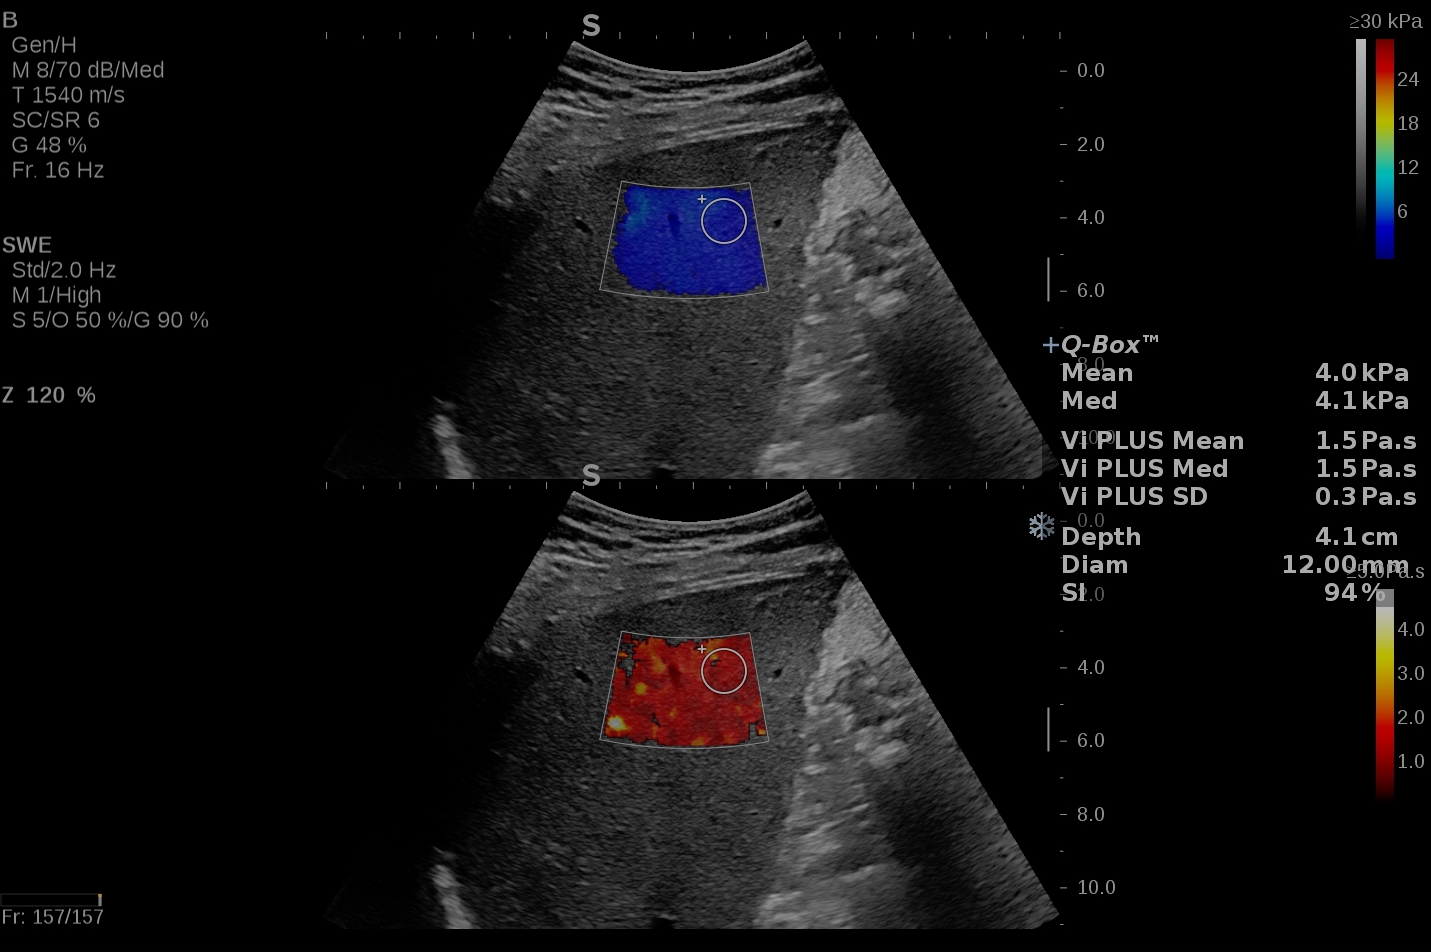

### Data availability: 
<!-- for the example notebooks -->
The information is stored in 2 parquet files: `liver_ultrasound.parquet`and `liver_ultrasound_aggregated.parquet`

### Relevant links

* Pheno Knowledgebase: https://knowledgebase.pheno.ai/datasets/004-liver_ultrasound.html
* Pheno Data Browser: https://pheno-demo-app.vercel.app/folder/4

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('liver_ultrasound')
pl

PhenoLoader for liver_ultrasound with
58 fields
3 tables: ['liver_ultrasound', 'liver_ultrasound_aggregated', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,relative_location,units,bulk_dictionary,sampling_rate,transformation,list_of_tags,stability,sexed,debut,completed
tabular_field_name,,,,,,,,,,,,,,,,,,,,
timezone,Timezone,Timezone,4,liver_ultrasound,Categorical (single),Collection time,001_03,Multiple,category,NaN,liver_ultrasound/liver_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
collection_date,Collection date (YYYY-MM-DD),Collection date (YYYY-MM-DD),4,liver_ultrasound,Date,Collection time,NaN,Multiple,datetime64[ns],NaN,liver_ultrasound/liver_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
collection_timestamp,Collection timestamp,Collection timestamp,4,liver_ultrasound,Datetime,Collection time,NaN,Multiple,"datetime64[ns, Asia/Jerusalem]",NaN,liver_ultrasound/liver_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
liver_ultrasound_qbox_depth,Liver ultrasound qbox depth,Liver ultrasound ShearWave Elastography (SWE) ...,4,liver_ultrasound,Continuous,Auxiliary,NaN,Multiple,float,NaN,liver_ultrasound/liver_ultrasound.parquet,cm,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
liver_ultrasound_qbox_diameter,Liver ultrasound qbox diameter,Liver ultrasound SWE Q-Box diameter,4,liver_ultrasound,Continuous,Auxiliary,NaN,Multiple,float,NaN,liver_ultrasound/liver_ultrasound.parquet,mm,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
liver_ultrasound_stability_index,Liver ultrasound stability index,Liver ultrasound stability index tool (SI) for...,4,liver_ultrasound,Continuous,Auxiliary,NaN,Multiple,float,NaN,liver_ultrasound/liver_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
elasticity_qbox_minimum,Elasticity (qbox minimum),"Elasticity, minimum value measured within the ...",4,liver_ultrasound,Continuous,Primary,NaN,Multiple,float,NaN,liver_ultrasound/liver_ultrasound.parquet,kPa,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
elasticity_qbox_maximum,Elasticity (qbox maximum),"Elasticity, maximum value measured within the ...",4,liver_ultrasound,Continuous,Primary,NaN,Multiple,float,NaN,liver_ultrasound/liver_ultrasound.parquet,kPa,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
elasticity_qbox_median,Elasticity (qbox median),"Elasticity, median of the values measured with...",4,liver_ultrasound,Continuous,Primary,NaN,Multiple,float,NaN,liver_ultrasound/liver_ultrasound.parquet,kPa,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN


# Plot histogram and ecdf for elasticity_median_median_of_qboxes at baseline visit


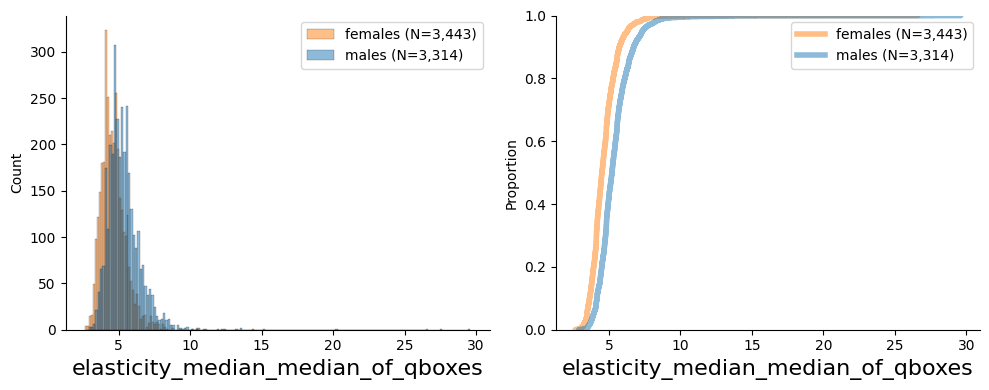

,count,mean,std,min,25%,50%,75%,max
elasticity_median_median_of_qboxes,6757.0,5.017764,1.190037,2.65,4.24,4.84,5.56,29.6


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "elasticity_median_median_of_qboxes"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)